In [3]:
# %pip install --upgrade scikit-learn==0.23.0r

First, we install the thing. Then we can load the data.

In [4]:
from sklearn.datasets import fetch_california_housing
X, y = fetch_california_housing(return_X_y=True)

In [5]:
from sklearn.neighbors import KNeighborsRegressor

In [6]:
mod=KNeighborsRegressor()

In [31]:
mod.fit(X,y)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [44]:
pred= mod.predict(X)

In [14]:
>>> import matplotlib

In [15]:
>>> import matplotlib.pyplot as plt

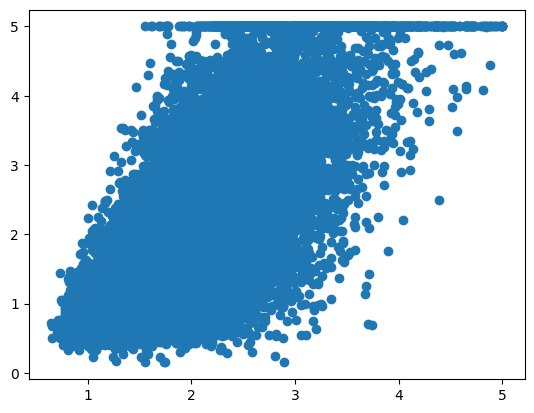

In [22]:
plt.scatter(pred,y)

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [32]:
pipe = Pipeline([('scaler', StandardScaler()),("model",KNeighborsRegressor(n_neighbors=1,))])

In [33]:
pipe.fit(X,y)

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30


In [34]:
pred= pipe.predict(X)

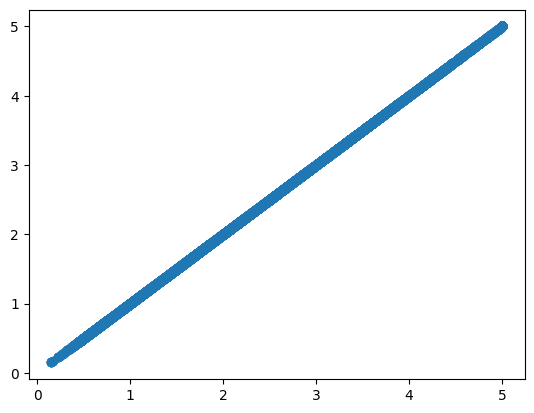

In [35]:
plt.scatter(pred,y)

In [11]:
from sklearn.datasets import fetch_california_housing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [16]:
X,y = fetch_california_housing(return_X_y=True)

pipe =  Pipeline([("scale",StandardScaler()),("model",KNeighborsRegressor(n_neighbors=1,))])

In [26]:
GridSearchCV(estimator=pipe,param_grid=[{'n_neighbors':1}])

,estimator,Pipeline(step...eighbors=1))])
,param_grid,[{'n_neighbors': 1}]
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [27]:
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model', KNeighborsRegressor(n_neighbors=1))],
 'transform_input': None,
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(n_neighbors=1),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 1,
 'model__p': 2,
 'model__weights': 'uniform'}

In [37]:
mod = GridSearchCV(estimator=pipe,param_grid={'model__n_neighbors':[1,2,3,4,5,6,7,8,9,10]})

In [39]:
mod.fit(X,y)

,estimator,Pipeline(step...eighbors=1))])
,param_grid,"{'model__n_neighbors': [1, 2, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [40]:
mod.cv_results_

{'mean_fit_time': array([0.05403662, 0.05031438, 0.04617653, 0.07131839, 0.07130184,
        0.06983733, 0.0634974 , 0.06440125, 0.06461105, 0.05792999]),
 'std_fit_time': array([0.00611634, 0.00488778, 0.00167479, 0.00663386, 0.00820242,
        0.0113557 , 0.00814379, 0.00605817, 0.00384472, 0.00684042]),
 'mean_score_time': array([0.37022533, 0.38087692, 0.39040136, 0.65966082, 0.78319063,
        0.81322269, 0.7442409 , 0.735954  , 0.71332765, 0.66844602]),
 'std_score_time': array([0.0522573 , 0.03940802, 0.03902339, 0.10450637, 0.05831532,
        0.0787015 , 0.063141  , 0.0551932 , 0.04328746, 0.08221758]),
 'param_model__n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value=999999),
 'params': [{'model__n_neighbors': 1},
  {'model__n_neighbors': 2},
  {'model__n_neighbors': 3},
  {'model__n_neighbors': 4},
  {'model__n_neighbors': 5},
  {'

In [46]:
import pandas as pd
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.054037,0.006116,0.370225,0.052257,1,{'model__n_neighbors': 1},0.187329,0.088762,0.388375,0.278805,0.406689,0.269992,0.120379,10
1,0.050314,0.004888,0.380877,0.039408,2,{'model__n_neighbors': 2},0.368531,0.331973,0.504760,0.413119,0.508741,0.425425,0.071214,9
2,0.046177,0.001675,0.390401,0.039023,3,{'model__n_neighbors': 3},0.435837,0.407158,0.548467,0.468958,0.537370,0.479558,0.055419,8
3,0.071318,0.006634,0.659661,0.104506,4,{'model__n_neighbors': 4},0.462808,0.451124,0.567603,0.488509,0.560549,0.506119,0.048894,7
4,0.071302,0.008202,0.783191,0.058315,5,{'model__n_neighbors': 5},0.478794,0.476008,0.576246,0.502598,0.572286,0.521186,0.044331,6
5,0.069837,0.011356,0.813223,0.078702,6,{'model__n_neighbors': 6},0.493501,0.490363,0.584639,0.504318,0.578827,0.530330,0.042265,5
6,0.063497,0.008144,0.744241,0.063141,7,{'model__n_neighbors': 7},0.506359,0.497097,0.586361,0.508187,0.583880,0.536377,0.039984,4
7,0.064401,0.006058,0.735954,0.055193,8,{'model__n_neighbors': 8},0.515469,0.501640,0.589916,0.508803,0.589140,0.540994,0.039870,3
8,0.064611,0.003845,0.713328,0.043287,9,{'model__n_neighbors': 9},0.522309,0.506643,0.591425,0.510436,0.593730,0.544909,0.039270,2
9,0.057930,0.006840,0.668446,0.082218,10,{'model__n_neighbors': 10},0.526637,0.510995,0.590911,0.511542,0.599044,0.547826,0.038991,1


In [47]:
fetch_california_housing()

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [48]:
fetch_california_housing(return_X_y=True)

(array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)))

In [49]:
fetch_california_housing()['DESCR']

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 20640\n\n:Number of Attributes: 8 numeric, predictive attributes and the target\n\n:Attribute Information:\n    - MedInc        median income in block group\n    - HouseAge      median house age in block group\n    - AveRooms      average number of rooms per household\n    - AveBedrms     average number of bedrooms per household\n    - Population    block group population\n    - AveOccup      average number of household members\n    - Latitude      block group latitude\n    - Longitude     block group longitude\n\n:Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000).\n\nThis dataset was derived from the 1990 U.S